In [76]:
import numpy as np
import pandas as pd
import ipaddress
import netaddr
import matplotlib.pyplot as plt
from data_collection.parse_pcap import pcap_to_pandas, pcap_to_dict
from sklearn import linear_model

In [17]:
pcap = pcap_to_pandas('example_pcaps/tplink_switch.pcap')

### Description
Below, we train a logistic classifier that predicts whether or not a packet is a DNS request or response from the packet length.

In [181]:
# Select the DNS rows and determine whether the device is sending or receiving a request.
dns_set = pcap.loc[pcap['is_dns'] == True];

y = dns_set.apply(lambda row: 1 if row['dns_resp'] == None else 0, axis=1).values;
x = dns_set['length'].values.reshape(-1, 1);

# These x-valeus are used for plotting the scatter points only.
# I'm not great with these APIs tbh...
x_t = dns_set.loc[dns_set['dns_resp'].isnull()]['length'].values.reshape(-1, 1);

x_f = dns_set.loc[dns_set['dns_resp'].notnull()]['length'].values.reshape(-1, 1);

In [176]:
dns_set

,datetime,dns_query,dns_resp,ip_dst,ip_dst_int,ip_src,ip_src_int,is_dns,length,mac_dst,mac_dst_int,mac_src,mac_src_int,port_dst,port_src,protocol,time,time_normed
15,2017-12-07 15:11:31.532799,b's1a.time.edu.cn.',None,172.24.1.1,2.887254e+09,172.24.1.81,2.887254e+09,True,75,b8:27:eb:2d:24:15,202481588839445,50:c7:bf:09:f3:4c,88818833814348,53.0,32835.0,UDP,1.512677e+09,7.217349
16,2017-12-07 15:11:31.763646,b'devs.tplinkcloud.com.',None,172.24.1.1,2.887254e+09,172.24.1.81,2.887254e+09,True,80,b8:27:eb:2d:24:15,202481588839445,50:c7:bf:09:f3:4c,88818833814348,53.0,43866.0,UDP,1.512677e+09,7.448196
17,2017-12-07 15:11:31.775682,b'devs.tplinkcloud.com.',b'devs.tplinkcloud.com.',172.24.1.81,2.887254e+09,172.24.1.1,2.887254e+09,True,533,50:c7:bf:09:f3:4c,88818833814348,b8:27:eb:2d:24:15,202481588839445,43866.0,53.0,UDP,1.512677e+09,7.460232
21,2017-12-07 15:11:31.885528,b's1a.time.edu.cn.',b's1a.time.edu.cn.',172.24.1.81,2.887254e+09,172.24.1.1,2.887254e+09,True,121,50:c7:bf:09:f3:4c,88818833814348,b8:27:eb:2d:24:15,202481588839445,32835.0,53.0,UDP,1.512677e+09,7.570078
57,2017-12-07 15:11:47.922651,b's1b.time.edu.cn.',None,172.24.1.1,2.887254e+09,172.24.1.81,2.887254e+09,True,75,b8:27:eb:2d:24:15,202481588839445,50:c7:bf:09:f3:4c,88818833814348,53.0,39900.0,UDP,1.512678e+09,23.607201
58,2017-12-07 15:11:47.952146,b's1b.time.edu.cn.',b's1b.time.edu.cn.',172.24.1.81,2.887254e+09,172.24.1.1,2.887254e+09,True,91,50:c7:bf:09:f3:4c,88818833814348,b8:27:eb:2d:24:15,202481588839445,39900.0,53.0,UDP,1.512678e+09,23.636696
69,2017-12-07 15:12:03.990789,b'0.cn.pool.ntp.org.',None,172.24.1.1,2.887254e+09,172.24.1.81,2.887254e+09,True,77,b8:27:eb:2d:24:15,202481588839445,50:c7:bf:09:f3:4c,88818833814348,53.0,55754.0,UDP,1.512678e+09,39.675339
70,2017-12-07 15:12:04.028974,b'0.cn.pool.ntp.org.',b'0.cn.pool.ntp.org.',172.24.1.81,2.887254e+09,172.24.1.1,2.887254e+09,True,141,50:c7:bf:09:f3:4c,88818833814348,b8:27:eb:2d:24:15,202481588839445,55754.0,53.0,UDP,1.512678e+09,39.713524
118,2017-12-07 15:16:20.096710,b'fr.pool.ntp.org.',None,172.24.1.1,2.887254e+09,172.24.1.81,2.887254e+09,True,75,b8:27:eb:2d:24:15,202481588839445,50:c7:bf:09:f3:4c,88818833814348,53.0,34673.0,UDP,1.512678e+09,295.781260
119,2017-12-07 15:16:20.105092,b'fr.pool.ntp.org.',b'fr.pool.ntp.org.',172.24.1.81,2.887254e+09,172.24.1.1,2.887254e+09,True,513,50:c7:bf:09:f3:4c,88818833814348,b8:27:eb:2d:24:15,202481588839445,34673.0,53.0,UDP,1.512678e+09,295.789642


In [180]:
# Train the classifier (C is the regularization param)
logreg = linear_model.LogisticRegression(C=1e5);
logreg.fit(x, y);

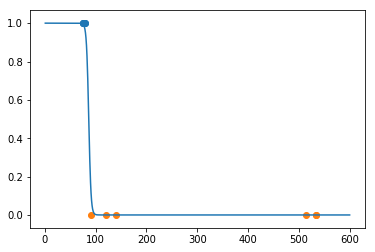

In [178]:
# Plot data
z = np.arange(1, 600, 0.5).reshape(-1, 1);
plt.plot(z, logreg.predict_proba(z)[:,1]);
plt.scatter(x_t, np.ones(len(x_t)));
plt.scatter(x_f, np.zeros(len(x_f)));